**마켓 데이터 크롤링**

# KRX 전종목 시가총액 순위


**2022 [thinkbee.kr]()**

# 시가총액 다운로드

한국거래소 정보데이터시스템(http://data.krx.co.kr) "전종목 시세"에서 종목 전체를 얻을 수 있습니다.

* http://data.krx.co.kr
    * 기본통계 > 주식 > 종목시세 > 전종목시세
    * http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020101

<img width="70%" src="http://i.imgur.com/HN7uuAx.png" >


조회와 파일로 다운받는데 csv, xlsx 로 다운받으면 

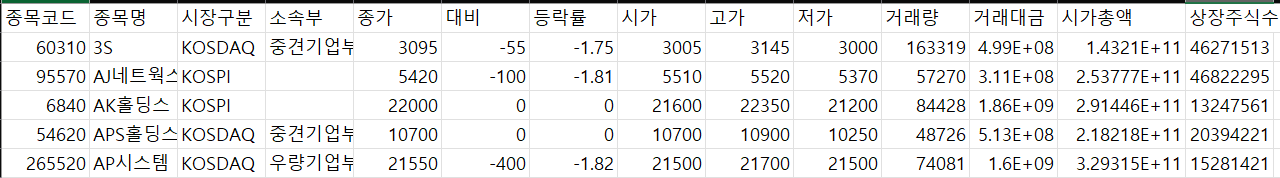

## (1) **전종목 시세** 다운로드 분석

시가총액 데이터 파일 (data.xls)를 다운로드로드에 대한 과정을 분석하기 위해서 브라우저개발자 모드 -> Network 탭에서 요청 URL과 파라미터를분석한다. 

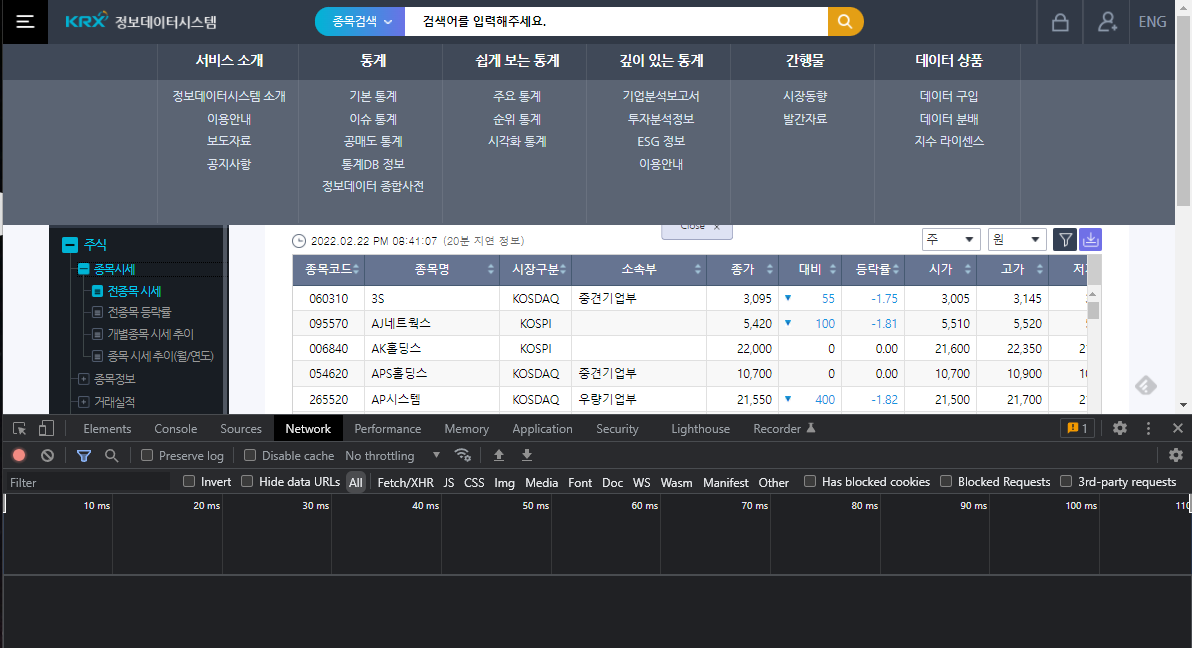


**전종목 시세** 화면이 호출되거나 , **`조회`** 버튼을 눌었을 때, `POST Request URL: http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd` 를 통해 데이터를 받는다.


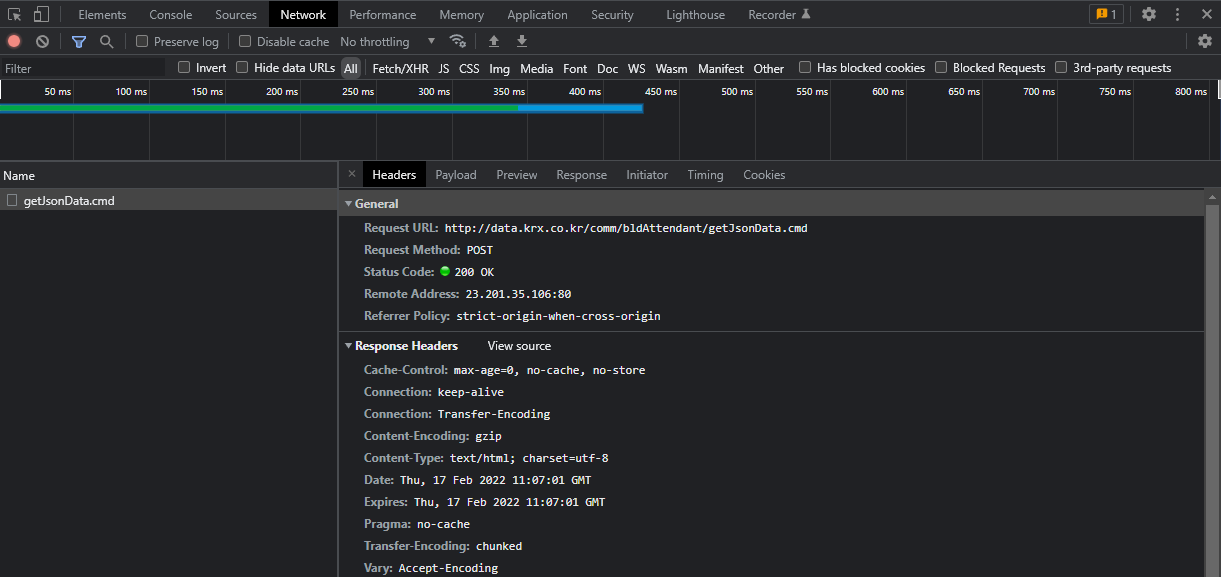

파일을 다운로드 받으려면 다운로드 링크에서 Excel (혹은 CSV) 로 다운로드 한다. 

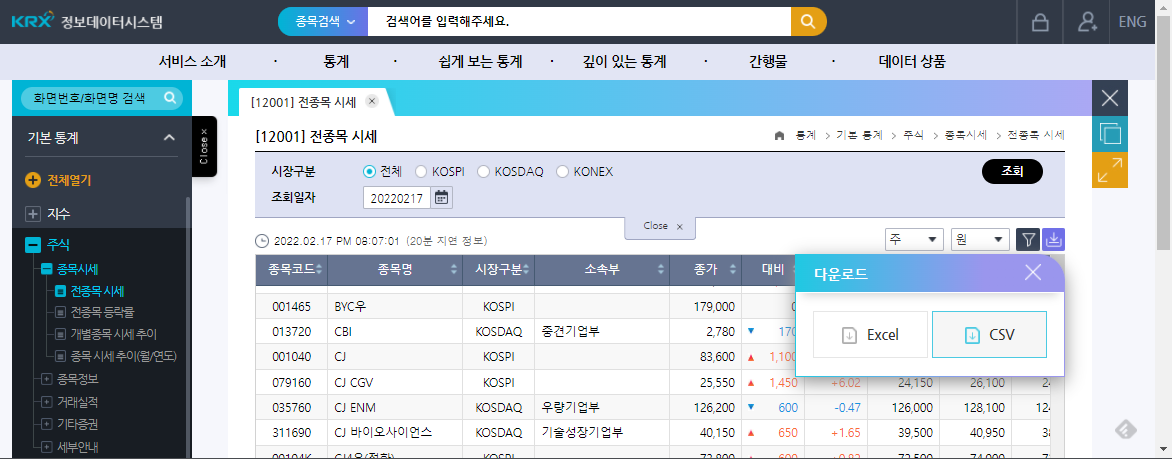


파일 다운로드를 클릭하면 실제 다운로드를 요청하는 URL 과 요청 파라미터를 얻을 수 있다.


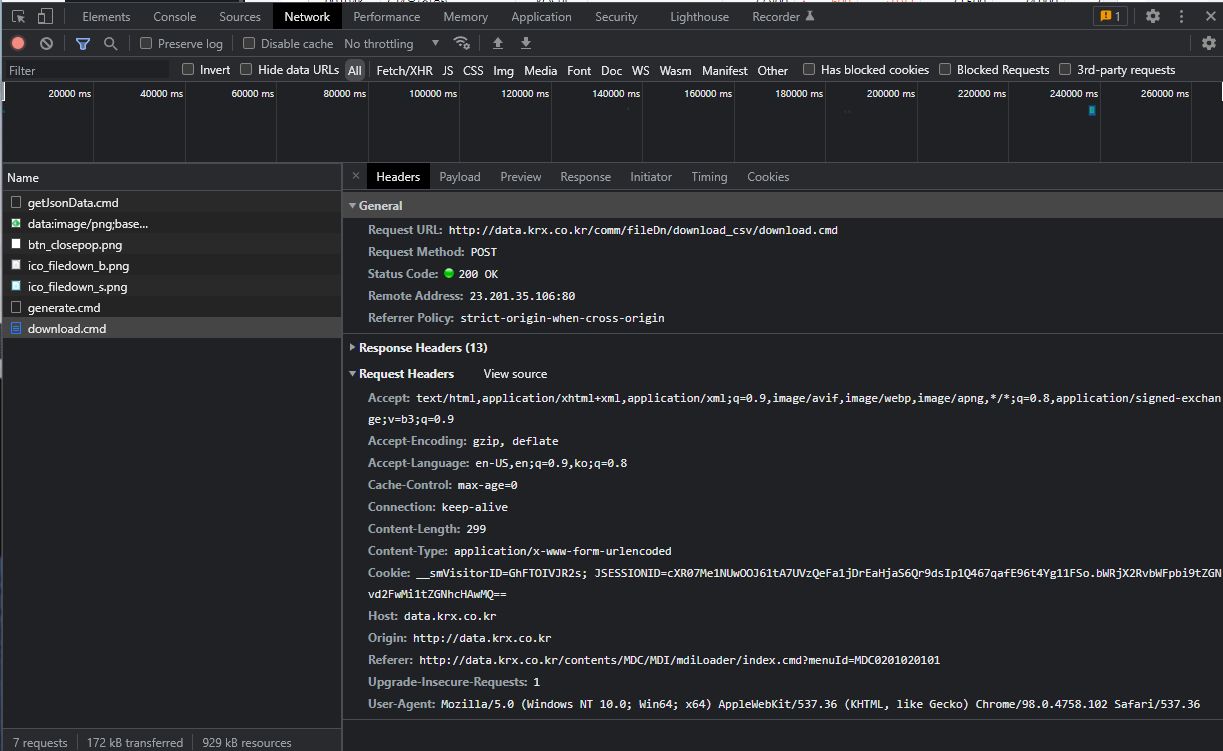

엑셀/CSV 다운로드를 클릭했을 때 나오는 ***generate.cmd*** 와 ***download.cmd*** 에서 얻은 정보만 입력해주면 크롤링이 가능하다.

## (2) **전종목 시세** 다운로드 구현

### `getJsonData.cmd` 호출

getJsonData.cmd 를 요청하면 json으로 OutBlock_1 객체에 데이터가 담겨있다. 이것은 화면에 표시되는 데이터이다.

In [ ]:
import requests

url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
data = {
    'bld': 'dbms/MDC/STAT/standard/MDCSTAT01501',
    'mktId': 'ALL',
    'trdDd': '20210104',
    'share': '1',
    'money': '1',
    'csvxls_isNo': 'false',
}

r = requests.post(url, data)
r.text[:1000]

In [ ]:
r.content

### `OutBlock_1` 분석

```python
{
   "OutBlock_1":[
      {
         "ISU_SRT_CD":"060310",
         "ISU_ABBRV":"3S",
         "MKT_NM":"KOSDAQ",
         "SECT_TP_NM":"중견기업부",
         "TDD_CLSPRC":"2,260",
         "FLUC_TP_CD":"1",
         "CMPPREVDD_PRC":"95",
         "FLUC_RT":"4.39",
         "TDD_OPNPRC":"2,185",
         "TDD_HGPRC":"2,320",
         "TDD_LWPRC":"2,135",
         "ACC_TRDVOL":"588,133",
         "ACC_TRDVAL":"1,306,838,265",
         "MKTCAP":"101,253,674,860",
         "LIST_SHRS":"44,802,511",
         "MKT_ID":"KSQ"
      },
      {
         "ISU_SRT_CD":"095570",
         "ISU_ABBRV":"AJ네트웍스",
         "MKT_NM":"KOSPI",
         "SECT_TP_NM":"",
         "TDD_CLSPRC":"4,580",
         "FLUC_TP_CD":"2",
         "CMPPREVDD_PRC":"-35",
         "FLUC_RT":"-0.76",
         "TDD_OPNPRC":"4,615",
         "TDD_HGPRC":"4,650",
         "TDD_LWPRC":"4,530",
         "ACC_TRDVOL":"344,232",
         "ACC_TRDVAL":"1,575,110,755",
         "MKTCAP":"214,446,111,100",
         "LIST_SHRS":"46,822,295",
         "MKT_ID":"STK"
      },
      // ... 생략 ...
}
```

### 파일로 저장

In [ ]:
with open('krx_download.xls', 'w') as f:
    f.write(r.content)

### json 으로 저장

In [ ]:
import json

j = json.loads(r.text)
j['OutBlock_1'][:2] # 처음 2건

In [ ]:
import pandas as pd

df = pd.json_normalize(j['OutBlock_1'])
df

컬럼들의 타입이 모두 object(str 문자열) 입니다

In [ ]:
df.dtypes

### 컬럼 이름 변경

다음 컬럼들은 ','를 없애고 수치값으로 바꾸어 주어야 합니다.

CMPPREVDD_PRC, FLUC_RT, TDD_OPNPRC, TDD_HGPRC, TDD_LWPRC, ACC_TRDVOL, ACC_TRDVAL, MKTCAP, LIST_SHRS


In [ ]:
# 전체에서 ','를 제거
df = df.replace(',', '', regex=True)

# 수치값으로 변환
numeric_cols = ['CMPPREVDD_PRC', 'FLUC_RT', 'TDD_OPNPRC', 'TDD_HGPRC', 'TDD_LWPRC', 
                'ACC_TRDVOL', 'ACC_TRDVAL', 'MKTCAP', 'LIST_SHRS'] 
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 시가총액순으로 소트
df = df.sort_values('MKTCAP', ascending=False) 
df

In [ ]:
df.dtypes

## (3) **전종목 시세** 현재화면 함수로 만들기

In [ ]:
import requests
import numpy as np
import pandas as pd
import json

def krx_marcap(date):
    '''
    날짜 date를 받아 해당 날짜의 주가시세 파일을 다운로드 한다.
    
    return:
    '''

    

In [ ]:
# 사용예
marcap = krx_marcap('20210104')
marcap

# (참고) FinanceDataReader

FinanceDataReader 구현되어 있어 손쉽게 가져다 쓸 수 있습니다.

https://github.com/FinanceData/FinanceDataReader/blob/master/krx/listing.py

# (참고) 데이터 상품
전종목 일자별 시세 데이터 2020년 1년치

<img width="60%" src="https://i.imgur.com/KF3ciha.png" >
